In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
%cd drive/My Drive/project_sym/csv_file

/content/drive/My Drive/project_sym/csv_file


In [0]:
ls

0to5_model.h5      hp97.h5   sym50.h5               symbols.h5      zero.csv
allsymbolsnew.csv  one.csv   symbol_final.csv       symbolsnew.csv
hash.csv           plus.csv  symbol_final_model.h5  symbolsnew.h5


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

In [0]:
def plot_rand(df, n):
  plt.imshow(df.iloc[n,:-1].values.reshape(84, 84),cmap='gray');



In [0]:
df= pd.read_csv('allsymbolsnew.csv')

In [0]:
df.head()

,pix-1,pix-2,pix-3,pix-4,pix-5,pix-6,pix-7,pix-8,pix-9,pix-10,pix-11,pix-12,pix-13,pix-14,pix-15,pix-16,pix-17,pix-18,pix-19,pix-20,pix-21,pix-22,pix-23,pix-24,pix-25,pix-26,pix-27,pix-28,pix-29,pix-30,pix-31,pix-32,pix-33,pix-34,pix-35,pix-36,pix-37,pix-38,pix-39,pix-40,...,pix-7018,pix-7019,pix-7020,pix-7021,pix-7022,pix-7023,pix-7024,pix-7025,pix-7026,pix-7027,pix-7028,pix-7029,pix-7030,pix-7031,pix-7032,pix-7033,pix-7034,pix-7035,pix-7036,pix-7037,pix-7038,pix-7039,pix-7040,pix-7041,pix-7042,pix-7043,pix-7044,pix-7045,pix-7046,pix-7047,pix-7048,pix-7049,pix-7050,pix-7051,pix-7052,pix-7053,pix-7054,pix-7055,pix-7056,class
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.350287,0.031624,0.148687,0.773666,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.350287,0.031624,0.148687,0.773666,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0


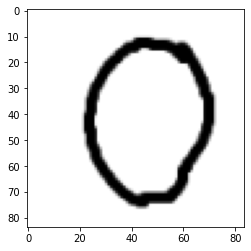

In [0]:
plot_rand(df, 7100)

In [0]:
X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

In [0]:
X.shape, y.shape

((8406, 7056), (8406,))

In [0]:
x_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.10, random_state=42)

In [0]:
x_train = x_train.reshape(x_train.shape[0], 84, 84, 1)
x_test = x_test.reshape(x_test.shape[0], 84, 84, 1)
input_shape = (84, 84, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (7565, 84, 84, 1)
Number of images in x_train 7565
Number of images in x_test 841


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()

model.add(Conv2D(168, kernel_size=(3,3), activation = 'relu' , input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(126, kernel_size=(3,3), activation = 'relu' , input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(84, kernel_size=(3,3), activation = 'relu' , input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(64, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(4,activation=tf.nn.softmax))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Using TensorFlow backend.


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 82, 82, 168)       1680      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 41, 41, 168)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 39, 39, 126)       190638    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 19, 19, 126)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 17, 17, 84)        95340     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 84)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5376)             

In [0]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)

In [0]:
n=np.random.randint(x_test.shape[0])
plt.imshow(x_test[n].reshape(84, 84), cmap='gray');
plt.title(y_test[n]);
plt.axis('off');

In [0]:
model.save('symbolsnew.h5')

In [0]:
np.argmax(model.predict(x_test[n].reshape(1, 84, 84, 1)))